# Assignment 2: Data Preprocessing, Parameter Tuning, Model Evaluation Using SVM and K-NN

## What you will learn

* Data preprocessing
* Parameter Tuning
* Model evaluation
* Employing SVM and K-NN methods on the data

## Setup

* Download [Anaconda Python 3.6](https://www.anaconda.com/download/) for consistent environment.
* Download Pandas library.
* If you use pip environment then make sure your code is compatible with versions of libraries provided within Anaconda's Python 3.6 distribution.

## Submission
* Do not change any variable/function names.
* Just add your own code and don't change existing code
* Save this file and rename it to be **studentid_lastname.ipynb** (student id (underscore) last name.ipynb) where your student id is all numbers.
* Export your .ipynb file to PDF (File > Download as > PDF via Latex). **Please don't leave this step for final minutes**.
* Submit both the notebook and PDF files (**NO ZIP, RAR,..**).
* If you happen to use any external library not included in Anaconda (mention in **Submission Notes** section below)

In [2]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# remove the following statements if you like to see warnings
import warnings
warnings.filterwarnings('ignore')

## Submission Notes
(Please write any notes here that you think I should know during marking)
Please run the get_predicted() function (shown below) before running the code for the different metrics for kNN.

# [NO MARKS]  Warming Up
Various interesting machine learning datasets can be found at:
- https://archive.ics.uci.edu/ml/index.php

For this task, we have chosen the Heart Disease dataset, available at:
- https://archive.ics.uci.edu/ml/datasets/heart+Disease

**Data Set Information**

- The dataset contains **303 subjects** with **76 attributes**. 
- All the published experiments refer to using a subset of **14 of attributes**. 
- The **goal** field in the dataset refers to **the presence of heart disease** in the patient. 
- It is integer valued from 0 (no presence) to 4 (highest presence). 

**Note:** Since the class number 4 is very sparse (just 13 subjects). We have dropped the subjects belonging to class 4 from the data.

Experiments with the Cleveland dataset have concentrated on---attempting to distinguish **the presence** (values 1, 2, 3, 4) from **the absence** (value 0).

**Attribute Information**

14 attributes are been used: 

1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute)


### (no marks) Reading the data


In [9]:
# Reading the data-set
df = pd.read_csv('./processed_cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'prediction']
print('Data-set shape: ',df.shape)

df.tail(n=10)

Data-set shape:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0



### (no marks) Removing the missing data
There are many missing data marked by '?' in the dataset. We will use *dropping* as the most straight-forward technique for removing such data-points.

In [10]:
# Removing all subjects from class 4
df = df.loc[df.prediction != 4]

# Replacing the missing data '?' with NAN values
df.replace('?', np.nan, inplace=True) 
df = df.dropna()
df = df.astype(float)


### (no marks) Splitting the data


In [11]:
# Separating the data and the labels
# X Contains the first 13 features 
# Y contains the prediction values
X = np.asarray(df[df.columns[:-1]]).astype(np.float32)
y = np.asarray(df.prediction)

# Splitting the data into the train and the test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

train_index, test_index = next(sss.split(X, y))
# Of the 284, some of training (227) and some for testing (57)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
    
print('Training data: \n',X_train)
print('\n')
print('Training labels: \n',y_train)

Training data: 
 [[45.  0.  4. ...  2.  0.  3.]
 [41.  1.  2. ...  2.  0.  6.]
 [42.  1.  4. ...  1.  0.  3.]
 ...
 [67.  1.  4. ...  2.  2.  7.]
 [65.  1.  4. ...  2.  1.  7.]
 [62.  0.  4. ...  1.  0.  3.]]


Training labels: 
 [0. 0. 0. 1. 0. 3. 0. 0. 0. 1. 1. 3. 0. 1. 1. 0. 2. 3. 0. 1. 3. 3. 0. 0.
 0. 2. 0. 0. 3. 0. 0. 0. 3. 1. 2. 0. 0. 3. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 3. 1. 2. 0. 2. 2. 0. 0. 0. 0. 1. 3. 1. 0. 2. 0. 0. 0. 0. 1. 0. 0. 0.
 3. 0. 0. 0. 1. 0. 0. 0. 3. 1. 0. 0. 1. 1. 1. 0. 0. 3. 0. 0. 0. 2. 2. 0.
 0. 0. 0. 0. 0. 3. 0. 2. 2. 2. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 2.
 2. 0. 0. 1. 0. 0. 0. 1. 3. 0. 0. 0. 0. 0. 0. 2. 2. 1. 2. 0. 1. 0. 2. 0.
 3. 1. 0. 0. 0. 3. 0. 0. 0. 2. 2. 0. 2. 1. 0. 0. 0. 3. 3. 0. 0. 0. 0. 1.
 0. 1. 3. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 3. 0. 1. 0. 0. 3. 0. 2. 3. 0. 0.
 0. 0. 2. 0. 1. 1. 0. 0. 3. 0. 2. 1. 0. 2. 2. 0. 0. 0. 1. 0. 0. 0. 3. 1.
 2. 0. 3. 0. 0. 3. 0. 3. 1. 2. 0.]


## [10 marks] Data Exploration

a) (3 marks) Use `pandas` to find the ratio of the presence of disease versus the absence within the different `sex`.

**Note:** `0` is female and `1` is male.

In [12]:
# we have defined a new column which is `true` if there is a presence of disease (i.e., prediction is [1, 2, 3])
df['has_disease'] = df.apply(lambda x: x.prediction in [1, 2, 3], axis=1)

gb = df.groupby(['sex'])

# Get female and male groups
females = gb.get_group(0)
males = gb.get_group(1)

# Further group female and male data according to presence of disease
gb_f = females.groupby(['has_disease'])
gb_m = males.groupby(['has_disease'])

# Apply ratio function and output calculated valules
f_sick = gb_f.apply(lambda x: x[x.has_disease==True])
f_notsick = gb_f.apply(lambda x: x[x.has_disease==False])
f_ratio = len(f_sick)/len(f_notsick)

m_sick = gb_m.apply(lambda x: x[x.has_disease==True])
m_notsick = gb_m.apply(lambda x: x[x.has_disease==False])
m_ratio = len(m_sick)/len(m_notsick)

# This seems very long and convoluted for no reason?

print('Female Ratio: ', f_ratio)
print('Male Ratio: ', m_ratio)

Female Ratio:  0.323943661971831
Male Ratio:  1.1348314606741574


b) (7 marks) Do the same thing for age. Split the age groups as follows (left included, right isn't):

1. [29, 49)
2. [49, 69)
3. [69, inf)

And then find the average ratio of prevalence of the heart disease within the each group.

In [13]:
# write your code here
def find_ratio(to_group, column='has_disease'):
    # Apply ratio function and output calculated values
    group = to_group.groupby([column])
    sick = group.apply(lambda x: x[x.has_disease==True])
    notsick = group.apply(lambda x: x[x.has_disease==False])
    ratio = len(sick)/len(notsick)
    return ratio
    
# Split into appropriate groups
group_1 = df[df['age'].between(29.0, 49.0, inclusive=True)]
group_1 = group_1.groupby(['age']).apply(lambda x: x[x.age<49])

group_2 = df[df['age'].between(49.0, 69.0, inclusive=True)]
group_2 = group_2.groupby(['age']).apply(lambda x: x[x.age<69])

group_3 = df.groupby(['age']).apply(lambda x: x[x.age>=69])

g1_ratio = find_ratio(group_1)
g2_ratio = find_ratio(group_2)
g3_ratio = find_ratio(group_3)

print('Group 1 Ratio: ', g1_ratio)
print('Group 2 Ratio: ', g2_ratio)
print('Group 3 Ratio: ', g3_ratio)
print('Average: ', (g1_ratio + g2_ratio + g3_ratio)/3)

Group 1 Ratio:  0.38596491228070173
Group 2 Ratio:  1.0421052631578946
Group 3 Ratio:  0.375
Average:  0.6010233918128655


### (no marks) Utility function

In [14]:
# Do not change the function
# This function is adapted from the sklearn website
# This function let you draw a confusion matrix for your problem

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1 2]
 [3 4]]


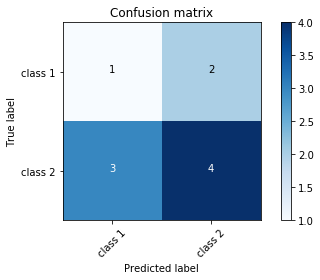

In [15]:
# usage
plot_confusion_matrix(np.array([[1, 2], [3, 4]]), ['class 1', 'class 2'])

# Task 1 [20 marks]

### a) [10 marks] Applying KNN to the data

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        32
         1.0       0.30      0.27      0.29        11
         2.0       0.50      0.14      0.22         7
         3.0       0.38      0.43      0.40         7

   micro avg       0.67      0.67      0.67        57
   macro avg       0.50      0.45      0.45        57
weighted avg       0.64      0.67      0.64        57

Confusion matrix, without normalization
[[31  1  0  0]
 [ 5  3  0  3]
 [ 1  3  1  2]
 [ 0  3  1  3]]


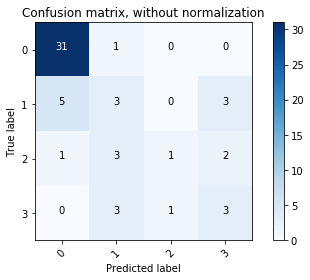

In [16]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import MinMaxScaler

# Task 2
# Add your code in the following part:

# We use min max scaler to normalize the features between [0, 1] 
scaler = MinMaxScaler()

# Add your code here instead of ...
scaler.fit(X_train)

# Create a knn classifier instance here (If you don't add anything here, your code won't execute!)
knn_clf = KNeighborsClassifier()

# Fit the classifier using the train data (If you don't add anything here, your code won't execute!)
# Need to transform the data using scalar.transform when training
# Fit model using X_train training data and the y_train target values
# Training in KNN only consists of storing the data and its labels (via supervised learning)
knn_clf.fit(scaler.transform(X_train), y_train)

# Predict the test class labels using the trained classifier (If you don't add anything here, your code won't execute!)
# Need to also transform the data when predicting using the trained model
# Using the model, apply kNN to predict the labels on the test data
y_pred = knn_clf.predict(scaler.transform(X_test))

# (If you don't add anything here, your code won't execute!) 
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

### b) [5 marks] Between $K=3$ and $k=5$ which one gives more  accuracy ?

Between K = 5 and K = 3, K = 5 gives greater accuracy, as seen by the higher value returned from the accuracy_score function below.

In [17]:
from sklearn.metrics import accuracy_score

# write your code here and populate `y_pred_k5` and `y_pred_k3`
# metric is how the distance calculation is done for NN where minkowski is default to euclidean distance.
def get_predicted(K=5, metric='minkowski'):
    knn_clf = KNeighborsClassifier(n_neighbors=K, metric=metric, algorithm='brute')
    knn_clf.fit(scaler.transform(X_train), y_train)
    y_pred = knn_clf.predict(scaler.transform(X_test))
    return y_pred

y_pred_k5 = get_predicted(5)
y_pred_k3 = get_predicted(3)
print(accuracy_score(y_test, y_pred_k5), accuracy_score(y_test, y_pred_k3))

0.6666666666666666 0.5964912280701754


### c) [5 marks] Between $\ell_1$, $\ell_2$, and $cosine$ similarity which one is better in term of accuracy?

The two metrics Cosine and L2 give the highest accuracy and the two metrics also allow for equal accuracy. The L1 accuracy is the lowest of the three metrics investigated.

In [18]:
# write your code here to experiment with different distance metrics
# use argument `metric` to change to a different distance by default it is euclidean distance 

# Use the above get_predicted function to experiment with different metrics

# Cosine similarity measures the similarity between two vectors by considering dot product between them.
y_pred_cos = get_predicted(metric='cosine')
y_pred_l1 = get_predicted(metric='l1')
y_pred_l2 = get_predicted(metric='l2')
print('Cosine Accurcy: ', accuracy_score(y_test, y_pred_cos)) 
print('L1 Accuracy: ', accuracy_score(y_test, y_pred_l1)) 
print('L2 Accuracy: ', accuracy_score(y_test, y_pred_l2))

Cosine Accurcy:  0.6666666666666666
L1 Accuracy:  0.6491228070175439
L2 Accuracy:  0.6666666666666666


# Task 2 [10 marks]

### Understanding the pipelining architecture of `Sklearn`

In the code above, you had to call `scaler` for every prediction by a model. This can be avoided by using a `pipeline` mechanism within sklearn. Look at the code below:

1. We create a data scaler (can be any sclaer with fit and transform functions).
2. We create SVC object (again with fit anf transform functions).
3. Then we create a pipeline: `data --> scaler --> svc --> fit`.
4. The same transformation is also applied during the prediction phase.

We further use a `GridSearchCV` for the SVC's parameters tuning.

In [19]:
# Task 2
from sklearn.preprocessing import StandardScaler
# Creating a SVM classifier instance
# Using the RBF kernal by default (to apply the kernal trick/transformation into another dimension which can be separated linearly) 
svc = SVC()

# Add a scaler here (If you don't add anything here, your code won't execute!)
data_scaler = StandardScaler()

# Update the pipeline by adding the scaler from the previous line
model = make_pipeline(data_scaler, svc)

# Specifies a grid which should be exhaustively explored (i.e. hyper parameters which are not directly learnt within estimators)
# C and gamma specifically are used for non-linear classification (i.e. no longer using a line to separate the data but 
# another kernal)
# C: Change magnitude to tune how much misclassification you're ok with. i.e. allow smaller margin which classifies everything
# correctly vs larger margin with some misclassification
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Will keep the kernel as default and using C and Gamma values provided in param_grid, find the best possible combination
grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train, y_train)
print( grid.best_estimator_)

Wall time: 611 ms
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [20]:
# Selecting the best estimator after the parameter search
model = grid.best_estimator_

In [21]:
# Predicting the test labels
y_pred = model.predict(X_test)

In [22]:
# Printing the classification report
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        32
         1.0       0.43      0.27      0.33        11
         2.0       0.33      0.29      0.31         7
         3.0       0.25      0.14      0.18         7

   micro avg       0.65      0.65      0.65        57
   macro avg       0.45      0.42      0.42        57
weighted avg       0.59      0.65      0.61        57



Confusion matrix, without normalization
[[31  0  1  0]
 [ 7  3  1  0]
 [ 1  1  2  3]
 [ 1  3  2  1]]


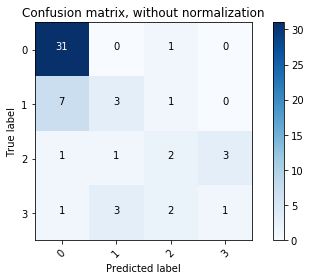

In [23]:
# Computing the confusion matrix for the test data
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using the previous function
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

# Task 3 [40 marks]

### How to handle the missing data

More information can be found here:
(https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

a) [6 scores] Name two numeric methods for dealing with the missing data (except dropping):
    
    Write the answer here:
    
    1- One option to deal with missing data is filling it with another value such as 0 or the mean of the dataset. This can be accomplished through the function fillna().
    
    2- Another option to deal with the missing data is applying interpolation. This can be accomplished through the interpolate() function.
    

b) [12 scores] Apply the methods that you mentioned in part (a) to the `df_with_missing_data` dataframe:

In [24]:
# Task 3 part (b)
# Add your code here (If you don't add anything here, your code won't execute!)

df_with_missing_data = pd.read_csv('./processed_cleveland.csv', header=None)
df_with_missing_data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                                'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'prediction']


# Replace all missing data with NaN and converrt to float
df_with_missing_data.replace('?', np.nan, inplace=True) 
df_with_missing_data = df_with_missing_data.astype(float)

# Apply first method of filling all missing data with 0s
df_1 = df_with_missing_data.fillna(0.0)

# Apply second method of filling all the missing data through interpolation
df_2 = df_with_missing_data.interpolate()

c) [22 scores] Apply the steps described in *Task 2* on `df_1` and `df_2` and show the results using `classification_report` and `plot_confusion_matrix`.

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        33
         1.0       0.14      0.18      0.16        11
         2.0       0.25      0.14      0.18         7
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         3

   micro avg       0.56      0.56      0.56        61
   macro avg       0.24      0.25      0.24        61
weighted avg       0.48      0.56      0.52        61

Confusion matrix, without normalization
[[31  2  0  0  0]
 [ 6  2  1  2  0]
 [ 2  3  1  1  0]
 [ 0  5  2  0  0]
 [ 0  2  0  1  0]]


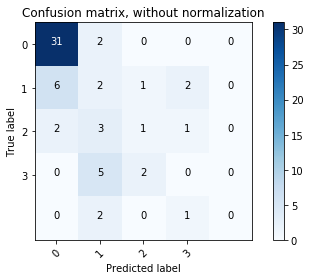

In [25]:
# Task 3 part (c)
# Add your code here
from sklearn.preprocessing import StandardScaler

def split_data(df):
    X = np.asarray(df[df.columns[:-1]]).astype(np.float32)
    y = np.asarray(df.prediction)
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    sss.get_n_splits(X, y)
    train_index, test_index = next(sss.split(X, y))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
    return data

def fit_model():
    svc = SVC()
    data_scaler = StandardScaler()
    model = make_pipeline(data_scaler, svc)
    param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
    grid = GridSearchCV(model, param_grid)
    return grid

data_df1 = split_data(df_1)
grid_df1 = fit_model()
grid_df1.fit(data_df1['X_train'], data_df1['y_train'])
model_df1 = grid_df1.best_estimator_
y_pred_df1 = model_df1.predict(data_df1['X_test'])
print(classification_report(y_pred=y_pred_df1,y_true=data_df1['y_test']))
cnf_matrix_df1 = confusion_matrix(data_df1['y_test'],y_pred_df1)
plot_confusion_matrix(cnf_matrix_df1, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

data_df2 = split_data(df_2)
grid_df2 = fit_model()
grid_df2.fit(data_df2['X_train'], data_df2['y_train'])
model_df2 = grid_df2.best_estimator_
y_pred_df2 = model_df2.predict(data_df2['X_test'])
# print(classification_report(y_pred=y_pred_df2,y_true=data_df2['y_test']))
# cnf_matrix_df2= confusion_matrix(data_df2['y_test'],y_pred_df2)
# plot_confusion_matrix(cnf_matrix_df2, classes=[0,1,2,3],
#                       title='Confusion matrix, without normalization')

# Task 4 [20 marks]

### Model Evaluation

For the given confusion matrix, answer the following questions.

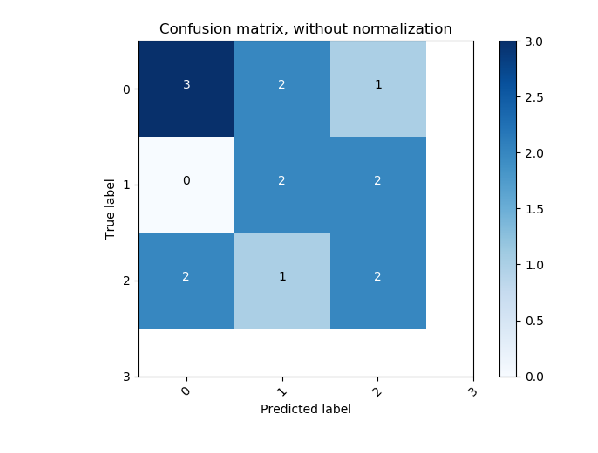

In [26]:
I = plt.imread('foo.png')
fig = plt.figure(figsize= (10,10))
plt.imshow(I)
plt.axis('off')
plt.show()

#### Calculate the following parameters (Use macro-average definition)

You can find all these definitions on https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html 
 and https://en.wikipedia.org/wiki/Confusion_matrix
 
 Write your answer in front of each parameter:

1- [2 scores] total number of instances = The total number of instances is the sum involving all the entries in the confusion matrix which is 3 + 2 + 1 + 0 + 2 + 2 + 2 + 1 + 2 = 15.

2- [2 scores] number of classes = There are three classes which are class 0, class 1, and class 2.

3- [2 scores] True positive (TP) = For the the sake of the True Positive calculation, class 0 has been defined as the positive classs while class 1 and class 2 make up the negative. Using this defintion, there are 3 true positives.

4- [2 scores] True negative (TN) = Using class 1 and class 2 as the negative classes, there are 2 true negatives for class 1 and 2 true negatives for class 2, giving a total of 4 true negatives.

5- [2 scores] False positive (FP) = There are 2 false positives i.e. where the 2 class 2 instances were incorrectly classified to be class 0.

6- [2 scores] False negative (FN) = There are 3 false negatives i.e. 2 class instances incorrectly identified as class 1 and one class 0 instance incorreclty identified as class 2.

7- [2 scores] Sensitivity, recall, hit rate, or true positive rate (TPR) = The true positive rate is equal to the number of true positives (i.e. 3) divided by the number of real positive cases in the data (i.e. 6) and therefore the TPR is 3/6 = 0.5 = 50%.

8- [2 scores] Specificity, selectivity or true negative rate (TNR) = The true negative rate is equal to the number of true negatives (i.e. 4) divided by the number of real negative cases in the data (i.e. 9) and therefore the TNR is 4/9 = 0.444 = 44.4%.

9- [4 scores] F1-Score = The precision (P) is equation to (TP/(TP + FP)) which is (3/(3+2)) = 0.6. The recall (R) was calculated above to be 0.5. The F1 score is equal to 2(P*R/(P+R)) which is 2(0.6*0.5/(0.5+0.6)) which is 0.54545 or 54.545%

In [ ]:
# Assignment end